In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Create the AirPassengers dataset
data = {
    "Month": pd.date_range(start="1949-01-01", periods=144, freq="M"),
    "Passengers": [
        112,118,132,129,121,135,148,148,136,119,104,118,
        115,126,141,135,125,149,170,170,158,133,114,140,
        145,150,178,163,172,178,199,199,184,162,146,166,
        171,180,193,181,183,218,230,242,209,191,172,194,
        196,196,236,235,229,243,264,272,237,211,180,201,
        204,188,235,227,234,264,302,293,259,229,203,229,
        242,233,267,269,270,315,364,347,312,274,237,278,
        284,277,317,313,318,374,413,405,355,306,271,306,
        315,301,356,348,355,422,465,467,404,347,305,336,
        340,318,362,348,363,435,491,505,404,359,310,337,
        360,342,406,396,420,472,548,559,463,407,362,405,
        417,391,419,461,472,535,622,606,508,461,390,432
    ]
}

df = pd.DataFrame(data)
df.set_index("Month", inplace=True)

print(df.head())


            Passengers
Month                 
1949-01-31         112
1949-02-28         118
1949-03-31         132
1949-04-30         129
1949-05-31         121


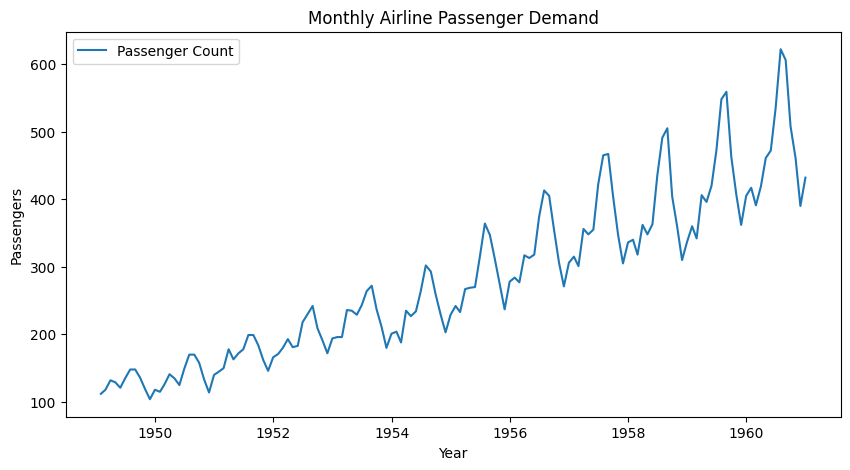

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df, label="Passenger Count")
plt.title("Monthly Airline Passenger Demand")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


In [4]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value}")

print("ADF Test on Original Data")
adf_test(df["Passengers"])


ADF Test on Original Data
ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598


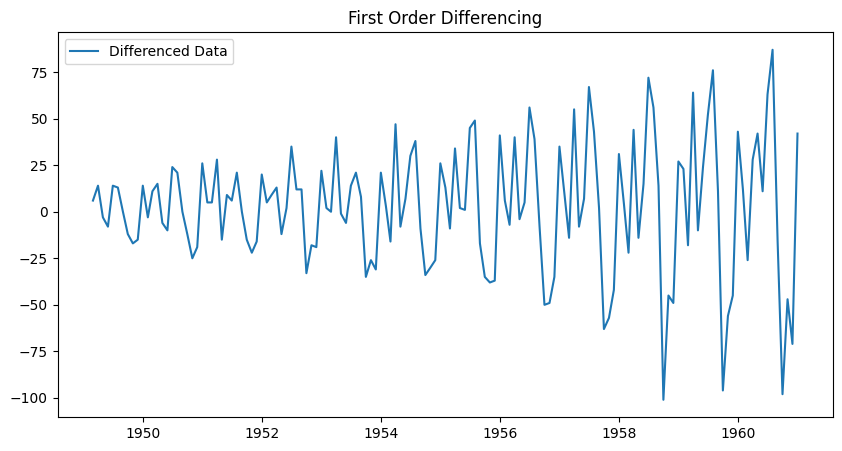

ADF Test After Differencing
ADF Statistic: -2.8292668241699994
p-value: 0.0542132902838255
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598


In [5]:
df_diff = df["Passengers"].diff().dropna()

plt.figure(figsize=(10,5))
plt.plot(df_diff, label="Differenced Data")
plt.title("First Order Differencing")
plt.legend()
plt.show()

print("ADF Test After Differencing")
adf_test(df_diff)


<Figure size 1000x400 with 0 Axes>

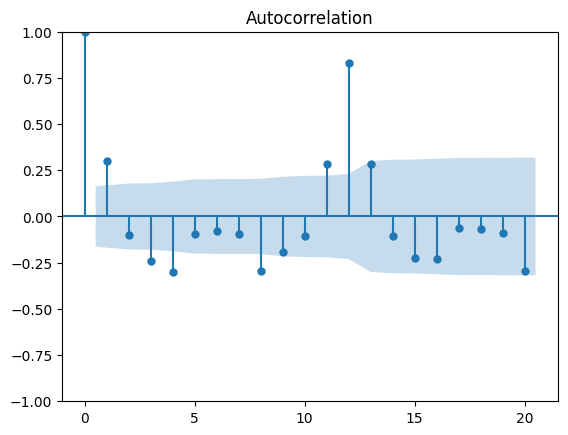

<Figure size 1000x400 with 0 Axes>

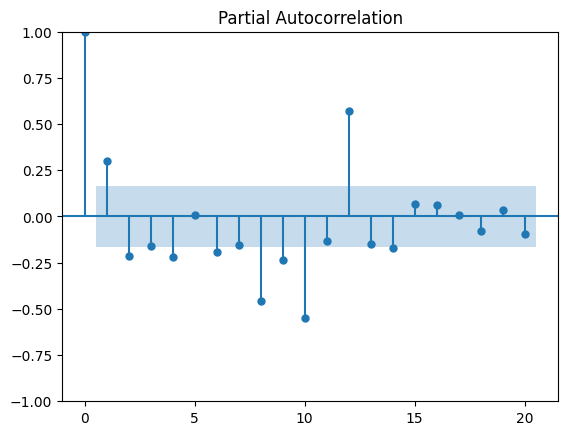

In [6]:
plt.figure(figsize=(10,4))
plot_acf(df_diff, lags=20)
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(df_diff, lags=20)
plt.show()


In [7]:
train_size = int(len(df) * 0.8)
train = df["Passengers"][:train_size]
test = df["Passengers"][train_size:]


In [8]:
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.summary())


C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91934\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Sun, 08 Feb 2026   AIC                           1057.516
Time:                        20:53:09   BIC                           1071.197
Sample:                    01-31-1949   HQIC                          1063.069
                         - 07-31-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

In [9]:
predictions = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 63.5453112665575
RMSE: 82.51301132137867


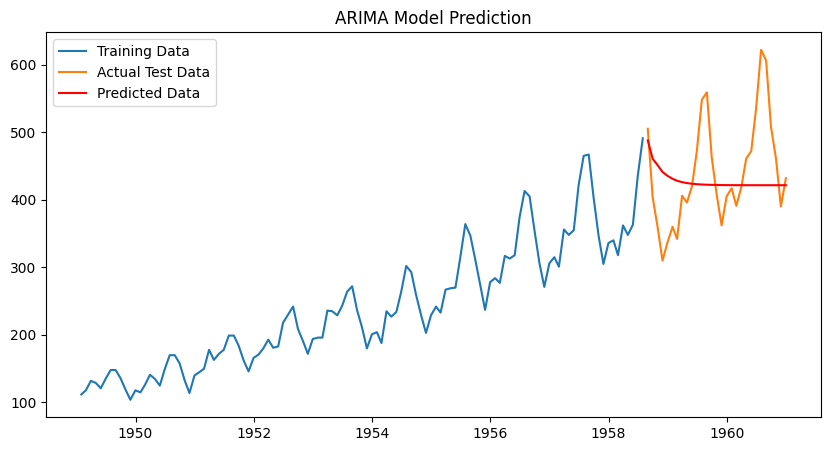

In [10]:
plt.figure(figsize=(10,5))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Test Data")
plt.plot(test.index, predictions, label="Predicted Data", color="red")
plt.legend()
plt.title("ARIMA Model Prediction")
plt.show()


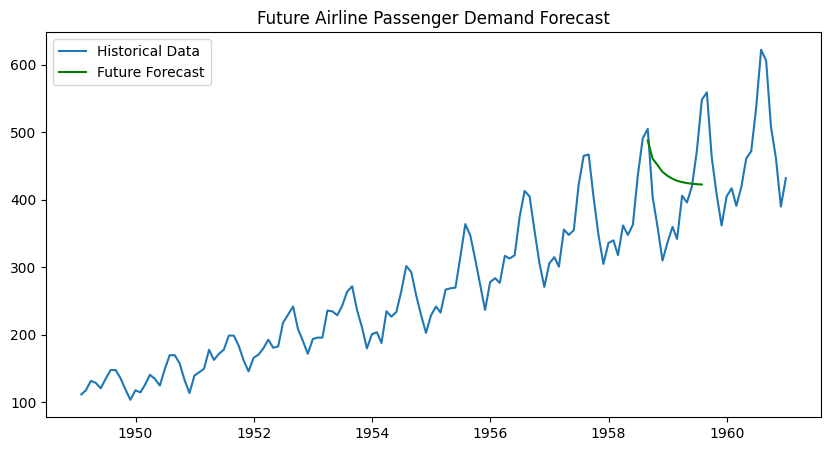

Future Passenger Demand Forecast:
1958-08-31    487.825560
1958-09-30    460.796800
1958-10-31    451.130922
1958-11-30    441.145635
1958-12-31    435.433346
1959-01-31    431.042077
1959-02-28    428.161471
1959-03-31    426.109439
1959-04-30    424.710071
1959-05-31    423.733689
1959-06-30    423.060606
1959-07-31    422.593654
Freq: M, Name: predicted_mean, dtype: float64


In [11]:
future_forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10,5))
plt.plot(df, label="Historical Data")
plt.plot(future_forecast.index, future_forecast, label="Future Forecast", color="green")
plt.legend()
plt.title("Future Airline Passenger Demand Forecast")
plt.show()

print("Future Passenger Demand Forecast:")
print(future_forecast)
